<a href="https://colab.research.google.com/github/iamfady/strawberry_disease_classification_CNN_image_data_generator/blob/main/strawberry_disease_classification_CNN_image_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## First, let's import the required libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization , Resizing , Rescaling , RandomFlip , RandomRotation
from keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Collect all variables in one place for easy modification


In [3]:
BATCH_SIZE = 32


IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

IMAGE_CHANNELS=3


## Import data into tensorflow dataset object

In [4]:
!pip install split-folders

In [5]:
!splitfolders --ratio 0.8 0.1 0.1 -- /content/drive/MyDrive/Data/StrawberryProject/StrawberryDiseasesDATASETS

Copying files: 5876 files [02:51, 34.19 files/s] 


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

In [8]:
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="/content/drive/MyDrive/Data/AugmentedImages"
)

Found 4699 images belonging to 8 classes.


In [9]:
train_generator.class_indices

{'Angular_LeafSpot': 0,
 'Anthracnose_Fruit _Rot': 1,
 'Blossom_Blight': 2,
 'Gray_Mold': 3,
 'Healty': 4,
 'Leaf_Spot': 5,
 'Powdery_Mildew_Fruit': 6,
 'Powdery_Mildew_Leaf': 7}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Angular_LeafSpot',
 'Anthracnose_Fruit _Rot',
 'Blossom_Blight',
 'Gray_Mold',
 'Healty',
 'Leaf_Spot',
 'Powdery_Mildew_Fruit',
 'Powdery_Mildew_Leaf']

In [11]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/output/val',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse"
)

Found 584 images belonging to 8 classes.


In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/output/test',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="sparse"
)

Found 593 images belonging to 8 classes.


## Model Architecture



In [21]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
n_classes = 8
EPOCHS=100

In [14]:
model = Sequential([


    Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64,  kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [16]:
#Compiling the Model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/100
47/47 [==============================] - 32s 677ms/step - loss: 0.3074 - accuracy: 0.8996 - val_loss: 0.4363 - val_accuracy: 0.8542
Epoch 2/100
47/47 [==============================] - 31s 654ms/step - loss: 0.2646 - accuracy: 0.9113 - val_loss: 0.5556 - val_accuracy: 0.8594
Epoch 3/100
47/47 [==============================] - 32s 672ms/step - loss: 0.2718 - accuracy: 0.9089 - val_loss: 0.5062 - val_accuracy: 0.8281
Epoch 4/100
47/47 [==============================] - 33s 688ms/step - loss: 0.2362 - accuracy: 0.9229 - val_loss: 0.3501 - val_accuracy: 0.9062
Epoch 5/100
47/47 [==============================] - 31s 657ms/step - loss: 0.2197 - accuracy: 0.9309 - val_loss: 0.3799 - val_accuracy: 0.9010
Epoch 6/100
47/47 [==============================] - 31s 660ms/step - loss: 0.2489 - accuracy: 0.9195 - val_loss: 0.4701 - val_accuracy: 0.8542
Epoch 7/100
47/47 [==============================] - 32s 681ms/step - loss: 0.2229 - accuracy: 0.9255 - val_loss: 0.4581 - val_accuracy:

In [23]:
scores = model.evaluate(test_generator)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 10s 500ms/step - loss: 0.4039 - accuracy: 0.9174
Test Accuracy: 91.73693060874939




## Plotting the Accuracy and Loss Curves


In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


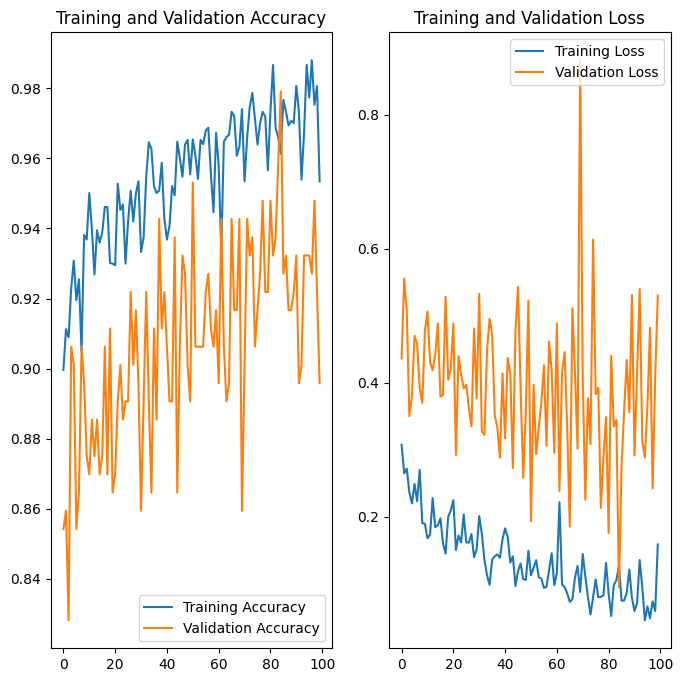

In [25]:
EPOCHS = len(history.history['loss'])

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## prediction on images

first image to predict
actual label: Angular_LeafSpot
1/1 [==============================] - 0s 211ms/step
predicted label: Angular_LeafSpot


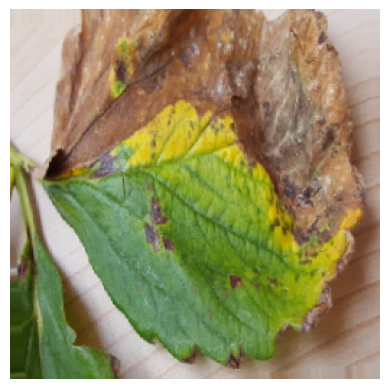

In [26]:
import numpy as np

for images_batch, labels_batch in test_generator:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")
    break

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


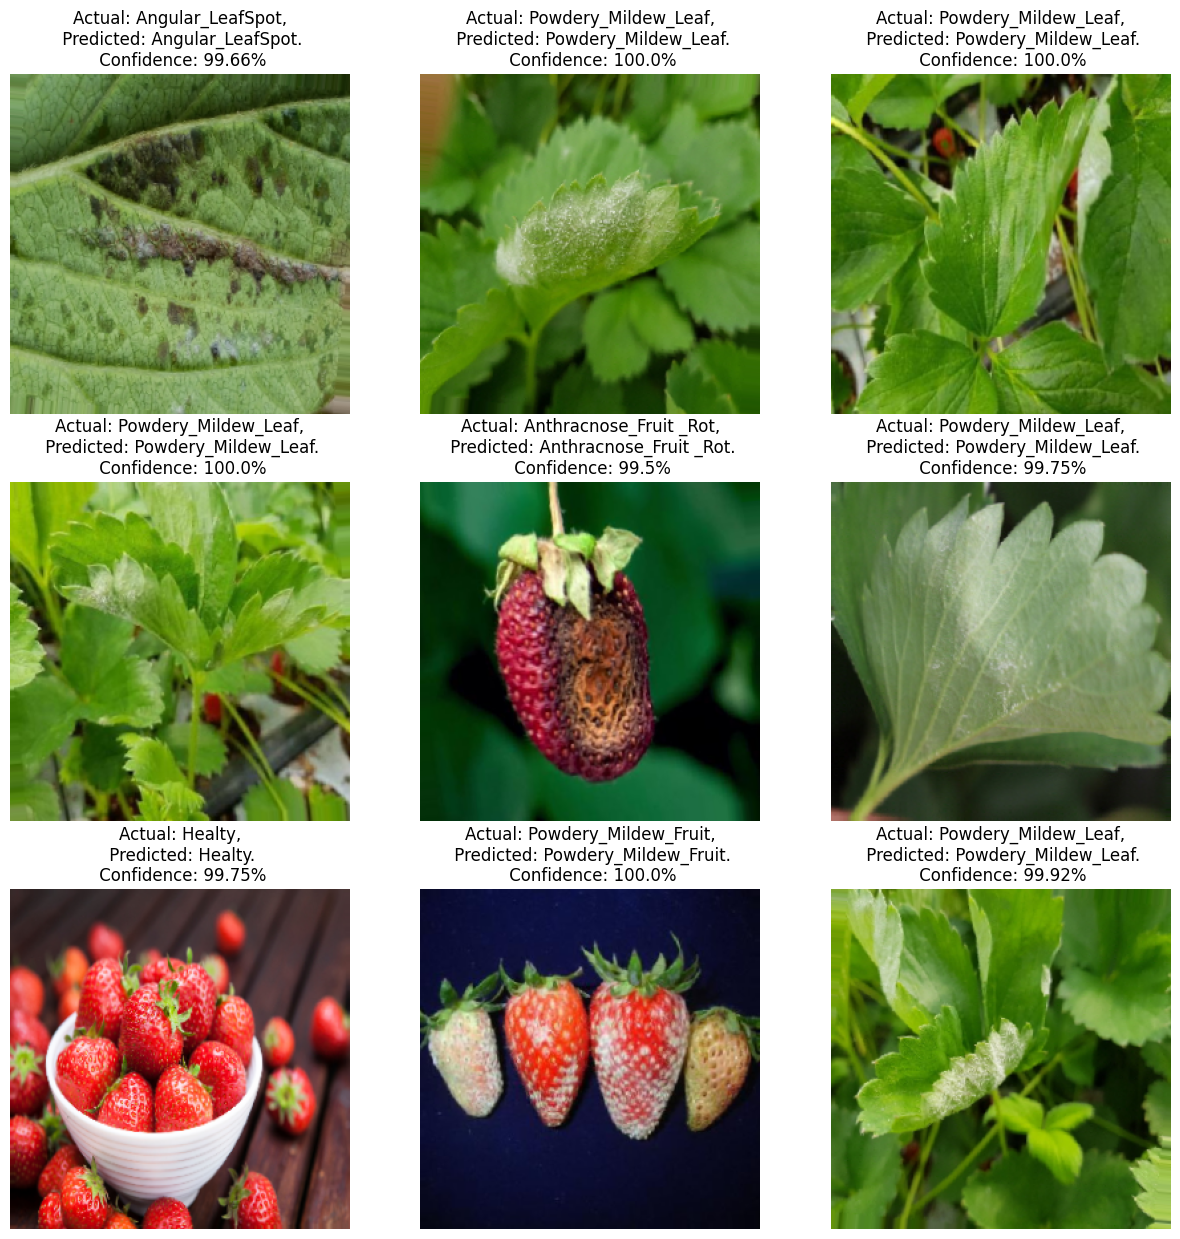

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break



## Dynamic Saving the Model


In [29]:
import os

if not os.path.exists("/content/drive/MyDrive/Data/StrawberryProject/Models"):
    os.makedirs("/content/drive/MyDrive/Data/StrawberryProject/Models")

In [30]:
def get_latest_model_version(model_dir):
    versions = []
    for filename in os.listdir(model_dir):
        if filename.endswith('.h5'):  # Check if it's a model file
            try:
                version = int(filename[:-3])  # Extract version number (remove '.h5')
                versions.append(version)
            except ValueError:
                pass  # Ignore files that don't follow the naming convention
    return max(versions, default=0)  # Return 0 if no model files found

model_dir = "/content/drive/MyDrive/Data/StrawberryProject/Models"
model_version = get_latest_model_version(model_dir) + 1
model.save(f"/content/drive/MyDrive/Data/StrawberryProject/Models/{model_version}.h5")
print("Done")

Done


In [32]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Data/StrawberryProject/Models/1.h5')

# Create the TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tfmodel = converter.convert()

# Save the TFLite model
with open('/content/drive/MyDrive/Data/StrawberryProject/Models/1.tflite', 'wb') as f:
    f.write(tfmodel)
